In [1]:
from copy import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#### 1. Load in the summarized subject stroop data

In [2]:
df = pd.read_pickle('gp_stroop.pkl')
NrSbj=len(df.sbjId.unique())
print('A total of ' + str(NrSbj) + ' subjects')
overallM = df.groupby('sbjId').sbjACC.mean().mean()
stroop_mean = 'Overall accuracy for the stroop task was ' + '{:.2f}'.format(overallM) + '%'
print(stroop_mean)

A total of 15 subjects
Overall accuracy for the stroop task was 94.61%


#### 2. Stroop task performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent)design 

- Mean accuracy

blockType  trialType
easy       con          95.364583
           inc          94.375000
hard       con          93.541667
           inc          95.156250
Name: sbjACC, dtype: float64

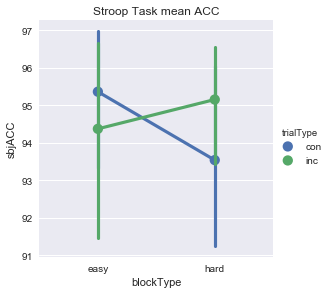

In [3]:
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title("Stroop Task mean ACC")
df.groupby(['blockType','trialType']).sbjACC.mean()

- Mean RT

blockType  trialType
easy       con          590.487614
           inc          602.267167
hard       con          593.797321
           inc          584.659450
Name: sbjRT, dtype: float64

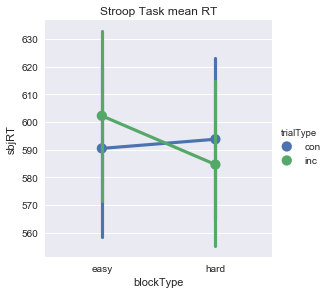

In [4]:
sns.factorplot(x='blockType',y = 'sbjRT', data=df, hue='trialType')
plt.title("Stroop Task mean RT")
df.groupby(['blockType','trialType']).sbjRT.mean()

#### 3. Load in the summarized subject memory data, calculate overall memory performance

In [5]:
df = pd.read_pickle('gp_memory.pkl')
CRrate = df.loc[df.blockType=='new','sbjACC'].mean()
acc_new='Overall memory accuracy for new items was ' + '{:.2f}'.format(CRrate) + '%'
print(acc_new)
overallOld = df.loc[df.blockType!='new','sbjACC'].mean()
acc_old='Overall memory accuracy for old items was ' + '{:.2f}'.format(overallOld) + '%'
print(acc_old)

Overall memory accuracy for new items was 76.50%
Overall memory accuracy for old items was 86.07%


#### 4. Recognition memory performance as a function of 2(Block Type: easy/hard) x 2 (Trial Type: congruent/incongruent) design 

blockType  trialType
easy       con          87.500000
           inc          82.500000
hard       con          88.333333
           inc          85.937500
Name: sbjACC, dtype: float64

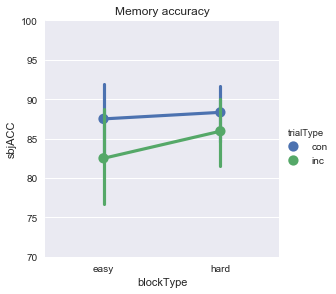

In [15]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'sbjACC', data=df2, hue='trialType')
plt.ylim(70,100)
plt.title('Memory accuracy')
df2.groupby(['blockType','trialType']).sbjACC.mean()

#### 5. Memory D-prime: z(Hits)-z(FA)

blockType  trialType
easy       con          0.144981
           inc         -0.361133
hard       con          0.229333
           inc         -0.013180
Name: dprime, dtype: float64

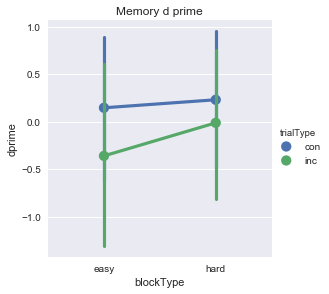

In [11]:
df_new = df.loc[df.blockType=='new',['sbjACC','sbjId']]
df_new['zFA'] = stats.zscore(1-(df_new.sbjACC/100))
df_new.drop('sbjACC',axis=1,inplace=True)
df2 = df2.merge(df_new)
df2['zHits'] = stats.zscore(df2.sbjACC/100)
df2['dprime']=df2.zHits - df2.zFA
sns.factorplot(x='blockType',y = 'dprime', data=df2, hue='trialType')
#plt.ylim(-1.5,1.5)
plt.title('Memory d prime')
df2.groupby(['blockType','trialType']).dprime.mean()

#### 6. Source memory performance

blockType  trialType
easy       con          47.291667
           inc          49.166667
hard       con          46.250000
           inc          45.937500
Name: sbjACC, dtype: float64

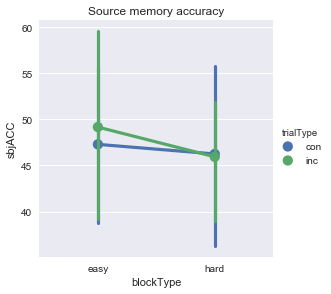

In [16]:
df = pd.read_pickle('gp_sourceMem.pkl')
sns.factorplot(x='blockType',y = 'sbjACC', data=df, hue='trialType')
plt.title('Source memory accuracy')
df.groupby(['blockType','trialType']).sbjACC.mean()

#### 7. Auditory probe detection accuracy

In [17]:
df = pd.read_pickle('gp_memory.pkl')
probe_new = df.loc[df.blockType=='new','probeACC'].mean()
probe_old = df.loc[df.blockType!='new','probeACC'].mean()
print('Overall tone detection following new items was ' + '{:.2f}'.format(probe_new) + '%')

Overall tone detection following new items was 53.33%


blockType  trialType
easy       con          53.333333
           inc          53.333333
hard       con          53.333333
           inc          53.333333
Name: probeACC, dtype: float64

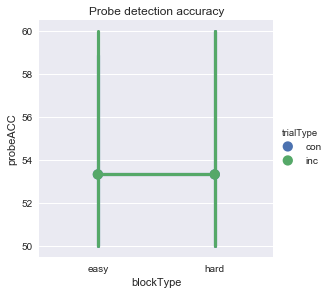

In [18]:
df2= copy(df.loc[df.blockType!='new'])
df2.blockType=pd.Categorical(df2.blockType, categories=['easy','hard'], ordered=True)
df2.trialType=pd.Categorical(df2.trialType, categories=['con','inc'], ordered=True)
sns.factorplot(x='blockType',y = 'probeACC', data=df2, hue='trialType')
plt.title('Probe detection accuracy')
df2.groupby(['blockType','trialType']).probeACC.mean()

- seems like subjects have been responding 'n' to all trials